## Finding accomodation in Seattle - Airbnb

> Finding an accomodation is the most typical problem to be solved, when travelling to other city or country. Hence, let's analyse Seattle Airbnb Data to draw some insights regarding the reservation prices, best time to visit, kind of rooms and most affordable areas to stay. This analysis has been done on the publicly available data of Seattle Airbnb on Kaggle.

### Business Understanding:
> I will be interested in the below questions for my next trip to Seattle
> 1. Which is the best time for someone to visit Seattle ?
> 2. What are the kind of rooms most requested ?
> 3. What are the features that most impact the price ?
> 4. What are the most affordable areas to stay ?


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as plticker
import seaborn as sns
import re
plt.style.use('ggplot')
%matplotlib inline

### Data Understanding
> First, we develop a general understanding of our data, by looking at the three datasets separately

In [2]:
df_listing = pd.read_csv('listings.csv')

In [3]:
df_listing.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [4]:
df_review = pd.read_csv('reviews.csv')
df_review.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


In [5]:
df_review.describe()

,listing_id,id,reviewer_id
count,8.484900e+04,8.484900e+04,8.484900e+04
mean,3.005067e+06,3.058765e+07,1.701301e+07
std,2.472877e+06,1.636613e+07,1.353704e+07
min,4.291000e+03,3.721000e+03,1.500000e+01
25%,7.946330e+05,1.725127e+07,5.053141e+06
50%,2.488228e+06,3.228809e+07,1.413476e+07
75%,4.694479e+06,4.457648e+07,2.762402e+07
max,1.024814e+07,5.873651e+07,5.281274e+07


In [39]:
# We won't be using reviewcsv for our analysis

In [6]:
df_calendar = pd.read_csv('calendar.csv')

In [7]:
df_calendar.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [8]:
df_listing.shape
#The listings file has 3818 rows and 92 columns as we see below

(3818, 92)

In [9]:
##the columns of this dataset and the description
df_listing.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'thumbnail_url', 'medium_url', 'picture_url',
       'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', '

In [10]:
df_listing.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,reviews_per_month
count,3.818000e+03,3.818000e+03,3.818000e+03,3816.000000,3816.000000,3818.000000,3818.000000,3818.000000,3802.000000,3812.000000,...,3171.000000,3160.000000,3165.000000,3160.000000,3167.000000,3163.000000,3162.000000,0.0,3818.000000,3191.000000
mean,5.550111e+06,2.016010e+13,1.578556e+07,7.157757,7.157757,47.628961,-122.333103,3.349398,1.259469,1.307712,...,94.539262,9.636392,9.556398,9.786709,9.809599,9.608916,9.452245,NaN,2.946307,2.078919
std,2.962660e+06,0.000000e+00,1.458382e+07,28.628149,28.628149,0.043052,0.031745,1.977599,0.590369,0.883395,...,6.606083,0.698031,0.797274,0.595499,0.568211,0.629053,0.750259,NaN,5.893029,1.822348
min,3.335000e+03,2.016010e+13,4.193000e+03,1.000000,1.000000,47.505088,-122.417219,1.000000,0.000000,0.000000,...,20.000000,2.000000,3.000000,2.000000,2.000000,4.000000,2.000000,NaN,1.000000,0.020000
25%,3.258256e+06,2.016010e+13,3.275204e+06,1.000000,1.000000,47.609418,-122.354320,2.000000,1.000000,1.000000,...,93.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000,NaN,1.000000,0.695000
50%,6.118244e+06,2.016010e+13,1.055814e+07,1.000000,1.000000,47.623601,-122.328874,3.000000,1.000000,1.000000,...,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,1.000000,1.540000
75%,8.035127e+06,2.016010e+13,2.590309e+07,3.000000,3.000000,47.662694,-122.310800,4.000000,1.000000,2.000000,...,99.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,2.000000,3.000000
max,1.034016e+07,2.016010e+13,5.320861e+07,502.000000,502.000000,47.733358,-122.240607,16.000000,8.000000,7.000000,...,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,37.000000,12.150000


In [11]:
print('first date in the dataset is '+df_calendar['date'].min()+' and last date is '+df_calendar['date'].max())

first date in the dataset is 2016-01-04 and last date is 2017-01-02


### Data Preparation
> In this step we will be performing some data cleaning to gather the insights from the data and then we will try to answer the questions which have been asked above

In [12]:
#which columns are not missing data
len(df_listing.columns[df_listing.isnull().sum()==0])

47

In [13]:
len(df_listing)

3818

In [14]:
#how much data is missing per column
df_listing[df_listing.columns[df_listing.isna().sum()>0]].isna().sum()/len(df_listing)

summary                        0.046359
space                          0.149031
neighborhood_overview          0.270299
notes                          0.420639
transit                        0.244631
thumbnail_url                  0.083814
medium_url                     0.083814
xl_picture_url                 0.083814
host_name                      0.000524
host_since                     0.000524
host_location                  0.002095
host_about                     0.224987
host_response_time             0.136983
host_response_rate             0.136983
host_acceptance_rate           0.202462
host_is_superhost              0.000524
host_thumbnail_url             0.000524
host_picture_url               0.000524
host_neighbourhood             0.078575
host_listings_count            0.000524
host_total_listings_count      0.000524
host_has_profile_pic           0.000524
host_identity_verified         0.000524
neighbourhood                  0.108958
zipcode                        0.001833


In [15]:
#Around 10 columns should be dropped due to too much missing data

#Also, there is no missing data for price, our target variable

In [16]:
#cleaning the calendar data to answer our first question
#replacing NaN values with 0
df_calendar.fillna(0, inplace=True)
df_calendar = df_calendar[df_calendar.price != 0]

In [17]:
#some columns have strange formatting and hey need to be fixed
def pricing_reformat(df_col):
    return df_col.str.strip('$').str.replace(',','').astype(float)

df_calendar['price']=pricing_reformat(df_calendar['price'])

In [18]:
#separating date column into day month and year
df_calendar['Year'],df_calendar['Month'],df_calendar['Day']=df_calendar['date'].str.split('-',2).str
  

C:\Users\maitrib\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  


In [19]:
df_calendar.head()

,listing_id,date,available,price,Year,Month,Day
0,241032,2016-01-04,t,85.0,2016,01,04
1,241032,2016-01-05,t,85.0,2016,01,05
9,241032,2016-01-13,t,85.0,2016,01,13
10,241032,2016-01-14,t,85.0,2016,01,14
14,241032,2016-01-18,t,85.0,2016,01,18


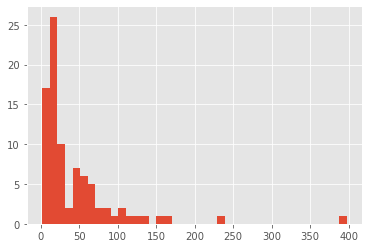

In [20]:
#For finding the cheapest areas, we should group the data by neighbourhoods. 
#Let's check if there is enough data for each neighbourhood
df_listing['neighbourhood_cleansed'].value_counts().hist(bins=40)

In [22]:
#some neighbourhoods don't have enough data, 
#Hence, neighbourhood groups column has been provided
df_listing['neighbourhood_group_cleansed'].value_counts()

Other neighborhoods    794
Capitol Hill           567
Downtown               530
Central Area           369
Queen Anne             295
Ballard                230
West Seattle           203
Rainier Valley         159
University District    122
Beacon Hill            118
Cascade                 89
Northgate               80
Delridge                79
Lake City               67
Magnolia                61
Seward Park             44
Interbay                11
Name: neighbourhood_group_cleansed, dtype: int64

In [23]:
#We shall analyse the neighbourhood groups column

#reformating the price column
df_listing['price']=pricing_reformat(df_listing['price'])

In [24]:
#Merging dataset for the second question
df_listing=df_listing.rename(index=str, columns={'id':'listing_id'})
df_list_cal = pd.merge(df_calendar, df_listing, on = 'listing_id')
df_list_cal.shape

(934542, 98)

In [25]:
### drop columns
#these cols have way too many missing numbers and hence should be dropped
drop_cols=['cleaning_fee','neighborhood_overview','notes','weekly_price','security_deposit','monthly_price','square_feet','license']
df_list_cal=df_list_cal.drop(drop_cols, axis=1)

In [26]:
##removing some other columns to reduce the dimensionality of the problem
drop_cols = ['date', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
             'space', 'description', 'experiences_offered', 'thumbnail_url', 'medium_url', 
             'picture_url','xl_picture_url', 'host_id', 'host_url', 'host_name',
            'host_location', 'host_about', 'host_response_time','city','state',
            'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
          'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
        'street', 'neighbourhood', 'neighbourhood_cleansed',
        'zipcode', 'market', 'transit','smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact','amenities', 'minimum_nights',
       'maximum_nights', 'calendar_updated', 'has_availability',
       'availability_30', 'availability_60', 'availability_90',
       'availability_365', 'calendar_last_scraped',
       'first_review', 'last_review',  'requires_license',
        'jurisdiction_names', 'instant_bookable',
       'cancellation_policy', 'require_guest_profile_picture',
       'require_guest_phone_verification', 'calculated_host_listings_count','price_y']

df_list_cal=df_list_cal.drop(drop_cols, axis=1)

In [27]:
#drop any row with missing price
df_list_cal.dropna(subset=['price_x'])

,listing_id,available,price_x,Year,Month,Day,host_since,host_response_rate,host_acceptance_rate,host_is_superhost,...,extra_people,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
0,241032,t,85.0,2016,01,04,2011-08-11,96%,100%,f,...,$5.00,207,95.0,10.0,10.0,10.0,10.0,9.0,10.0,4.07
1,241032,t,85.0,2016,01,05,2011-08-11,96%,100%,f,...,$5.00,207,95.0,10.0,10.0,10.0,10.0,9.0,10.0,4.07
2,241032,t,85.0,2016,01,13,2011-08-11,96%,100%,f,...,$5.00,207,95.0,10.0,10.0,10.0,10.0,9.0,10.0,4.07
3,241032,t,85.0,2016,01,14,2011-08-11,96%,100%,f,...,$5.00,207,95.0,10.0,10.0,10.0,10.0,9.0,10.0,4.07
4,241032,t,85.0,2016,01,18,2011-08-11,96%,100%,f,...,$5.00,207,95.0,10.0,10.0,10.0,10.0,9.0,10.0,4.07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
934537,10208623,t,87.0,2016,01,06,2014-04-25,100%,NaN,f,...,$0.00,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
934538,10208623,t,87.0,2016,01,07,2014-04-25,100%,NaN,f,...,$0.00,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
934539,10208623,t,87.0,2016,01,10,2014-04-25,100%,NaN,f,...,$0.00,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
934540,10208623,t,87.0,2016,01,11,2014-04-25,100%,NaN,f,...,$0.00,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
#fill missing values for numerical variables
def fillmissing_numeric(df):
    num_cols=df.select_dtypes(include=['float','int']).columns
    for col in num_cols:
        df[col].fillna(df[col].median(), inplace=True)

#dummy variables for categorical variables
def filldummy_cat(df):
    cat_cols=df.select_dtypes(include=['object']).columns
    for col in cat_cols:
        df=pd.concat([df.drop(col, axis=1), pd.get_dummies(df[col], prefix=col, prefix_sep='_', drop_first=True)], axis=1)
        
fillmissing_numeric(df_list_cal)
filldummy_cat(df_list_cal)

In [29]:
df_list_cal.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 934542 entries, 0 to 934541
Data columns (total 29 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   listing_id                    934542 non-null  int64  
 1   available                     934542 non-null  object 
 2   price_x                       934542 non-null  float64
 3   Year                          934542 non-null  object 
 4   Month                         934542 non-null  object 
 5   Day                           934542 non-null  object 
 6   host_since                    934450 non-null  object 
 7   host_response_rate            826028 non-null  object 
 8   host_acceptance_rate          764235 non-null  object 
 9   host_is_superhost             934450 non-null  object 
 10  neighbourhood_group_cleansed  934542 non-null  object 
 11  property_type                 934233 non-null  object 
 12  room_type                     934542 non-nul

### Results Evaluation
#### Here we will discuss the above asked questions
> 1. Which is the best time for someone to visit Seattle

In [30]:
#grouping the data on year and month
df_cal_updated = pd.DataFrame()
def group_yearmonth(df):
    df_cal_updated=df.groupby(['Year','Month']).price.mean()
    df_cal_updated=df_cal_updated.reset_index()
    df_cal_updated=df_cal_updated.rename(columns={'price':'average_Price'})
    df_cal_updated['year-Month']=df_cal_updated['Year'].map(str) + "-" + df_cal_updated['Month'].map(str)
    return df_cal_updated
df_cal_updated = group_yearmonth(df_calendar)  

In [31]:
df_cal_updated.head()

,Year,Month,average_Price,year-Month
0,2016,01,121.568409,2016-01
1,2016,02,124.293927,2016-02
2,2016,03,128.644488,2016-03
3,2016,04,135.097005,2016-04
4,2016,05,139.538183,2016-05


True

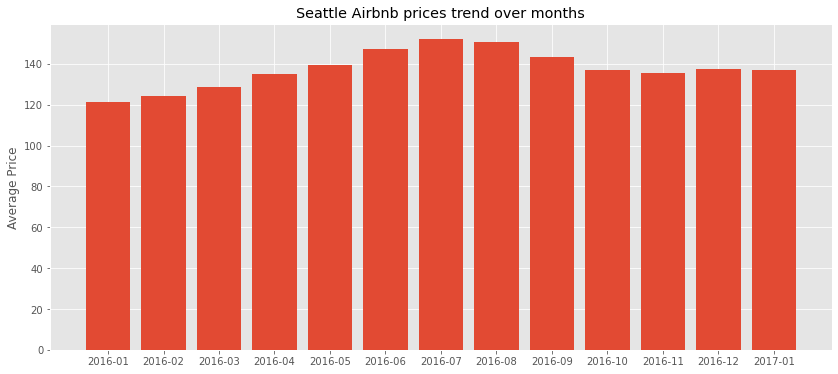

In [32]:
#generic function to plot a bar chart
def plot_barchart(x_attr,y_attr,title,y_lab,rot):
    plt.figure(figsize=(14,6))
    plt.ylabel(y_lab)
    plt.title(title)
    plt.xticks(rotation=rot)
    plt.bar(x_attr,y_attr)
    return True
#plotting average price vs year-month
plot_barchart(df_cal_updated['year-Month'],df_cal_updated['average_Price'],
'Seattle Airbnb prices trend over months','Average Price',0)

It can be clearly seen that the maximum average prices for listings were in the month of July, 2016 and August, 2016.

> 2 What are the kind of rooms most requested

In [33]:
df_list_cal.room_type.unique()

array(['Entire home/apt', 'Private room', 'Shared room'], dtype=object)

True

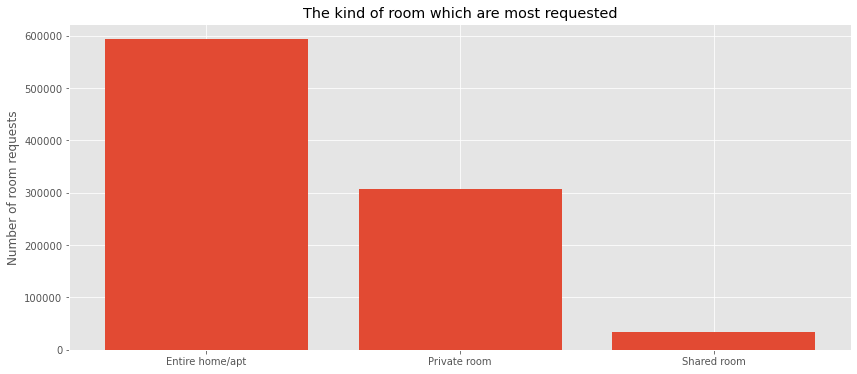

In [34]:
room = [df_list_cal['room_type'].value_counts()[0],
        df_list_cal['room_type'].value_counts()[1],
        df_list_cal['room_type'].value_counts()[2]]
room_type = ['Entire home/apt', 'Private room', 'Shared room']


plot_barchart(room_type,room,
'The kind of room which are most requested','Number of room requests',0)

Most of the people here as shown preferred to an apartment or an entire home.

> 3. What are the features that most impact the price

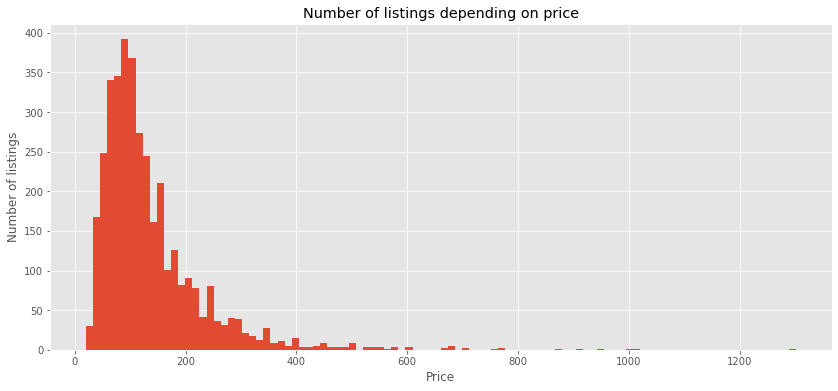

In [35]:
# plot between price vs listings
price = df_list_cal.groupby('listing_id')['price_x'].mean()
plt.figure(figsize=(14,6))
plt.hist(price,bins=100)

plt.ylabel('Number of listings')
plt.xlabel('Price')
plt.title('Number of listings depending on price')
plt.show()

We can say that the price of listings is between 25 USD to 350 USD.

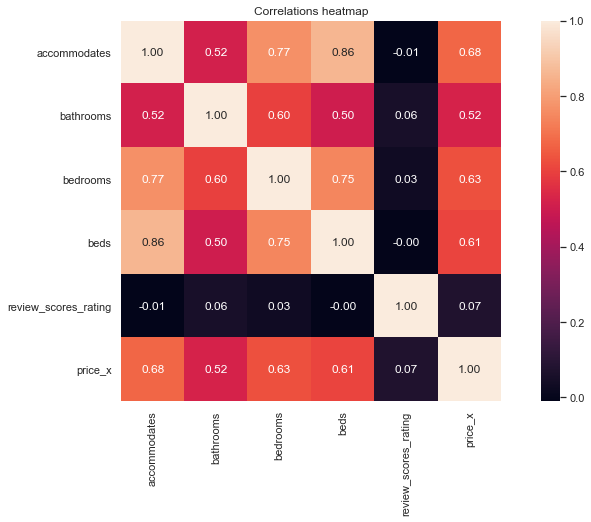

In [36]:
# Correlation between Price and Other Features

cols = ['accommodates','bathrooms','bedrooms','beds',
        'review_scores_rating', 'price_x']

#Find out correlation between columns and plot
corrs = np.corrcoef(df_list_cal[cols].values.T)

sns.set(font_scale=1)
sns.set(rc={'figure.figsize':(14,7)})
hm=sns.heatmap(corrs, cbar = True, annot=True, square = True, fmt = '.2f',
              yticklabels = cols, xticklabels = cols).set_title('Correlations heatmap')

From the correlations heatmap diagram we can see that price is correlated with number of accomodates, bathrooms, bedrooms and beds. And it's understandable, since more the area, larger the price will be.

> 4. What is the most affordable areas to stay

In [37]:
area_prices=df_list_cal.groupby(['neighbourhood_group_cleansed'], as_index=False, group_keys=False)['price_x']
area_avg=area_prices.mean().sort_values(['price_x'])
area_avg

,neighbourhood_group_cleansed,price_x
5,Delridge,90.926944
10,Northgate,93.455532
8,Lake City,94.518589
13,Rainier Valley,100.104924
1,Beacon Hill,100.668781
15,University District,104.709937
14,Seward Park,111.110338
7,Interbay,118.421037
11,Other neighborhoods,125.622015
0,Ballard,125.905980


True

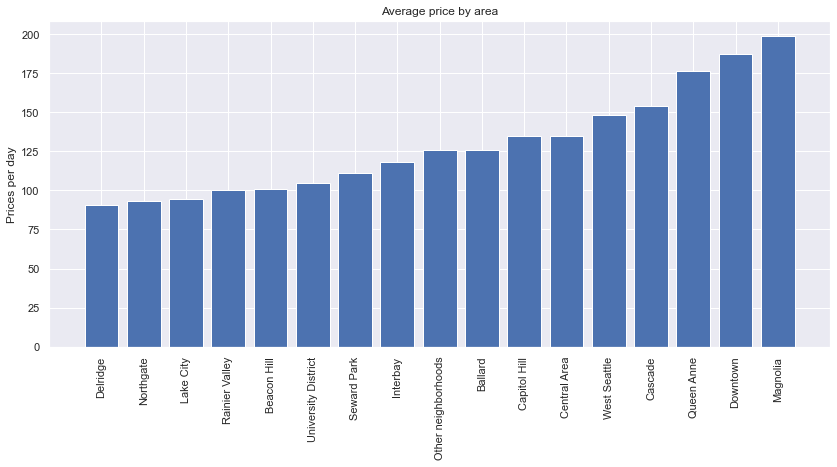

In [38]:
#plotting average price by area
plot_barchart(area_avg['neighbourhood_group_cleansed'],area_avg['price_x'],
'Average price by area','Prices per day',90)


This makes it clear the cheapest places to lodge is Delridge, followed closely by Northgate, Rainier Valley, Lake City, University District, and Beacon Hill

Those most expensive place, and by a significant margin, is Magnolia.

### Conclusion
#### We are able to now conclude the following:
> - In the month of July2016 and August 2016, the prices were maximum. One of the most important holidays, Independence Day (4th July) is in the month of july and hence this can be one of the reasons that the prices in July are the highest.
> - Most of the people prefer an apartment or an entire home.
> - Price of listings is between 25 USD to 350 USD.
> - Price is correlated with number of accomodates, bathrooms, bedrooms and beds. And it's understandable that more the area, larger the price will be.
> - The cheapest places to lodge is Delridge, followed closely by Northgate, Rainier Valley, Lake City, University District, and Beacon Hill. The most expensive place, and by a significant margin, is Magnolia.